База данных:

In [129]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
db_connection = sqlite3.connect('restaurant.db')

# Столики
table_data = {'ID': [1, 2, 3, 4, 5],
              'Seats': [4, 2, 3, 3, 1]}
df_tables = pd.DataFrame(table_data)
df_tables.to_sql('tables', db_connection, index=False, if_exists='replace')

#Меню
menu_data = {'ID': [1, 2, 3, 4, 5],
             'Dish': ['Цезарь', 'Паста', 'Хлеб', 'Кола', "Пирожное"],
             'Price': [200, 400, 50, 50, 150]}
df_menu = pd.DataFrame(menu_data)
df_menu.to_sql('menu', db_connection, index=False, if_exists='replace')

#Посетители
customers_data = {'ID': [1, 2, 3, 4, 5, 6],
                  'Name': ['Иван', 'Мария', 'Петр', 'Ирина', 'Василий', "Кристина"],
                  'Age': [25, 30, 22, 14, 17, 29],
                  'Tips': [0, 50, 50, 20, 100, 40],
                  'Table_ID': [1, 2, 3, 4, 5, 1]}
df_customers = pd.DataFrame(customers_data)
df_customers.to_sql('customers', db_connection, index=False, if_exists='replace')

#Заказы
orders_data = {'Client_ID': [1, 2, 1, 3, 2, 3, 4, 5, 6, 6],
               'Dish_ID': [2, 1, 3, 2, 4, 4, 4, 4, 5, 1],
               'Quantity': [2, 1, 3, 1, 1, 2, 1, 2, 1, 1]}
df_orders = pd.DataFrame(orders_data)
df_orders.to_sql('orders', db_connection, index=False, if_exists='replace')

db_connection.close()

Уровень 1

Выгрузить данные и отфильтровать их по какому-то значению.

In [139]:
db_connection = sqlite3.connect('restaurant.db')
df_customers = pd.read_sql('SELECT * FROM customers', db_connection)
df_table = pd.read_sql('SELECT * FROM tables', db_connection)
df_menu = pd.read_sql('SELECT * FROM menu', db_connection)
df_order = pd.read_sql('SELECT * FROM orders', db_connection)

#По возрасту посетителей
filtered_customers = df_customers[df_customers['Age'] > 17]
print("\nВзрослые посетители:")
print(filtered_customers)

# По количеству мест за столом
filtered_tables = df_table[df_table['Seats'] >= 3]
print("\nСтолики с 3 и более мест:")
print(filtered_tables)

# По ценам
filtered_menu = df_menu[(df_menu['Price'] >= 100) & (df_menu['Price'] <= 500)]
print("\nЦены между 100 и 500:")
print(filtered_menu)

db_connection.close()

print("\nДанные о клиентах:")
print(df_customers)
print("\nДанные о столиках:")
print(df_table)
print("\nДанные о блюдах:")
print(df_menu)
print("\nТаблица Заказ:")
print(df_order)


Взрослые посетители:
   ID      Name  Age  Tips  Table_ID
0   1      Иван   25     0         1
1   2     Мария   30    50         2
2   3      Петр   22    50         3
5   6  Кристина   29    40         1

Столики с 3 и более мест:
   ID  Seats
0   1      4
2   3      3
3   4      3

Цены между 100 и 500:
   ID      Dish  Price
0   1    Цезарь    200
1   2     Паста    400
4   5  Пирожное    150

Данные о клиентах:
   ID      Name  Age  Tips  Table_ID
0   1      Иван   25     0         1
1   2     Мария   30    50         2
2   3      Петр   22    50         3
3   4     Ирина   14    20         4
4   5   Василий   17   100         5
5   6  Кристина   29    40         1

Данные о столиках:
   ID  Seats
0   1      4
1   2      2
2   3      3
3   4      3
4   5      1

Данные о блюдах:
   ID      Dish  Price
0   1    Цезарь    200
1   2     Паста    400
2   3      Хлеб     50
3   4      Кола     50
4   5  Пирожное    150

Таблица Заказ:
   Client_ID  Dish_ID  Quantity
0          1      


Уровень 2

Написать запрос на объединение двух или более таблиц, также в запросе должна быть фильтрация

In [151]:
db_connection = sqlite3.connect('restaurant.db')

#Добавляем детали по заказам
query = '''
   SELECT c.ID AS Customer_ID, c.Name, c.Age,
           m.Dish, m.Price, c.Tips, o.Quantity
    FROM customers c
    JOIN orders o ON c.ID = o.Client_ID
    JOIN menu m ON o.Dish_ID = m.ID
'''
df_orders_merged = pd.read_sql(query, db_connection)

# Объединенная таблица
print("Объединенная:")
print(df_orders_merged)
# Объединенная таблица с фильтром по цене
print("\nОтфильтрованная, где цена > 100:")
df_merged_filtered = df_orders_merged[df_orders_merged['Price'] >= 100]
print(df_merged_filtered)
db_connection.close()

Объединенная:
   Customer_ID      Name  Age      Dish  Price  Tips  Quantity
0            1      Иван   25     Паста    400     0         2
1            1      Иван   25      Хлеб     50     0         3
2            2     Мария   30    Цезарь    200    50         1
3            2     Мария   30      Кола     50    50         1
4            3      Петр   22     Паста    400    50         1
5            3      Петр   22      Кола     50    50         2
6            4     Ирина   14      Кола     50    20         1
7            5   Василий   17      Кола     50   100         2
8            6  Кристина   29    Цезарь    200    40         1
9            6  Кристина   29  Пирожное    150    40         1

Отфильтрованная, где цена > 100:
   Customer_ID      Name  Age      Dish  Price  Tips  Quantity
0            1      Иван   25     Паста    400     0         2
2            2     Мария   30    Цезарь    200    50         1
4            3      Петр   22     Паста    400    50         1
8      

Уровень 3

Написать запрос, который посчитает какую-то сложную аналитику по БД, используя как можно больше таблиц. Построить графики и сделать выводы.

In [154]:
db_connection = sqlite3.connect('restaurant.db')
#Подсчет цены за заказ
df_orders_merged['TotalCost'] = df_orders_merged['Quantity'] * df_orders_merged['Price']
print("Заказы+цены:")
print(df_orders_merged)

# Подсчет общей суммы заказа каждого посетителя
df_total_cost_per_customer = df_orders_merged.groupby(['Customer_ID', 'Name', 'Age', "Tips"]).agg({'TotalCost': 'sum'}).reset_index()
df_total_cost_per_customer['TotalCostWithTips'] = df_total_cost_per_customer['TotalCost'] + df_total_cost_per_customer['Tips']


print("\nСчет:")
print(df_total_cost_per_customer)

db_connection.close()

Заказы+цены:
   Customer_ID      Name  Age      Dish  Price  Tips  Quantity  TotalCost
0            1      Иван   25     Паста    400     0         2        800
1            1      Иван   25      Хлеб     50     0         3        150
2            2     Мария   30    Цезарь    200    50         1        200
3            2     Мария   30      Кола     50    50         1         50
4            3      Петр   22     Паста    400    50         1        400
5            3      Петр   22      Кола     50    50         2        100
6            4     Ирина   14      Кола     50    20         1         50
7            5   Василий   17      Кола     50   100         2        100
8            6  Кристина   29    Цезарь    200    40         1        200
9            6  Кристина   29  Пирожное    150    40         1        150

Счет:
   Customer_ID      Name  Age  Tips  TotalCost  TotalCostWithTips
0            1      Иван   25     0        950                950
1            2     Мария   30    5

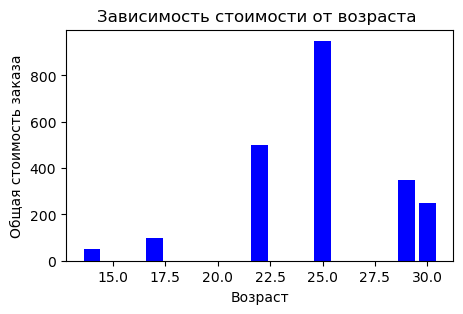

In [153]:
db_connection = sqlite3.connect('restaurant.db')
# Предположим, что по нашей таблице, посетители младше 18 лет, реже заказывают что-то дорогое
plt.figure(figsize=(5, 3))
plt.bar(df_total_cost_per_customer['Age'], df_total_cost_per_customer['TotalCost'], color='blue')
plt.xlabel('Возраст')
plt.ylabel('Общая стоимость заказа')
plt.title('Зависимость стоимости от возраста ')
plt.show()
db_connection.close()

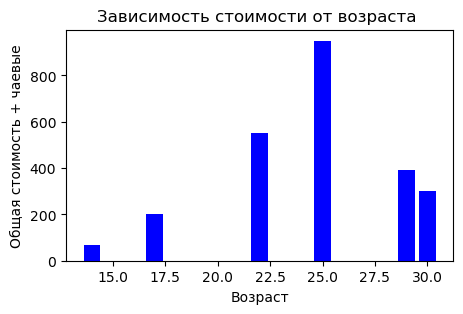

In [162]:
db_connection = sqlite3.connect('restaurant.db')
# Проверим общий счет вместе с чаевыми
plt.figure(figsize=(5, 3))
plt.bar(df_total_cost_per_customer['Age'], df_total_cost_per_customer['TotalCostWithTips'], color='blue')
plt.xlabel('Возраст')
plt.ylabel('Общая стоимость + чаевые')
plt.title('Зависимость стоимости от возраста ')
plt.show()
db_connection.close()

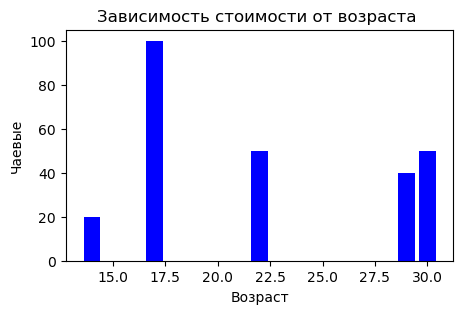

In [163]:
db_connection = sqlite3.connect('restaurant.db')
# Проверим чаевые
plt.figure(figsize=(5, 3))
plt.bar(df_total_cost_per_customer['Age'], df_total_cost_per_customer['Tips'], color='blue')
plt.xlabel('Возраст')
plt.ylabel('Чаевые')
plt.title('Зависимость стоимости от возраста ')
plt.show()
db_connection.close()

Итого: в нашем заведении посетители младше 18 лет реже заказывают дорогие позиции, но могут оставить хорошие чаевые. Предположим что официанты получают 10% стоимости заказа + чаевые

       Name  Age  TipsFromTotalCost
0      Иван   25               95.0
1     Мария   30               25.0
2      Петр   22               50.0
3     Ирина   14                5.0
4   Василий   17               10.0
5  Кристина   29               35.0


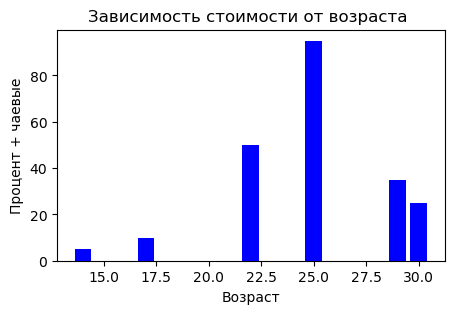

In [164]:
print(df_total_cost_per_customer[['Name', 'Age', 'TipsFromTotalCost']])
plt.figure(figsize=(5, 3))
plt.bar(df_total_cost_per_customer['Age'], df_total_cost_per_customer['TipsFromTotalCost'], color='blue')
plt.xlabel('Возраст')
plt.ylabel('Процент + чаевые')
plt.title('Зависимость стоимости от возраста ')
plt.show()

Итого: не смотря на то, что дети могут оставить чаевые, а взрослые не оставят, в среднем посетители старше 18 более выгодны для ресторана